In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math

In [2]:
infori = pd.read_csv('data/drug200.csv')

In [3]:
infori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(infori, infori['Drug'], test_size=0.25, random_state=0)

(array([66.,  0., 15.,  0.,  0., 13.,  0., 38.,  0., 18.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

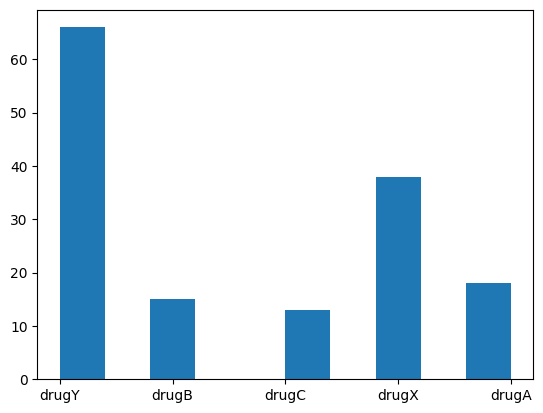

In [5]:
plt.hist(y_train)

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 71 to 172
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          150 non-null    int64  
 1   Sex          150 non-null    object 
 2   BP           150 non-null    object 
 3   Cholesterol  150 non-null    object 
 4   Na_to_K      150 non-null    float64
 5   Drug         150 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.2+ KB


In [7]:
x_train['Cholesterol'].value_counts()

Cholesterol
HIGH      82
NORMAL    68
Name: count, dtype: int64

In [8]:
# Construct Decision Tree using multiple ASM
# Create a BST with yes-no query style options
# traverse tree to evaluate
# For continuous variables, sort them in order and evaluate split points 
# of adjacent elements as possible splits

In [9]:
# We will first write the algo for only categorical data as that seems 
# easier

In [10]:
x_train['Sex'].unique()

array(['F', 'M'], dtype=object)

In [11]:
freqs = x_train['Sex'].value_counts()
print(freqs)
print(freqs.idxmin())
freqs_sq = np.square(freqs)
print(freqs_sq)
np.sum(freqs_sq)

Sex
M    79
F    71
Name: count, dtype: int64
F
Sex
M    6241
F    5041
Name: count, dtype: int64


11282

In [12]:
class DecisionTreeNode:
    node_data = None,
    node_score = None, 
    child_1 = None,
    child_2 = None,
    split_col = None,
    split_val = None,
    isLeaf = None
    

In [13]:
def calculate_gini(node, col):
    # 1 - sum(pi^2) for all i in col
    # count frequency for every row in col
    n2 = len(node.index) ** 2
    if n2 == 0:
        print('How?', node.index)
    tmp1 = node[col].value_counts()
    tmp2 = np.square(tmp1)
    tmp3 = np.sum(tmp2)
    tmp4 = tmp3 / n2
    tmp5 = 1 - tmp4
    return tmp5

In [14]:
def calculate_entropy(node, col):
    # 1 - sum(pi^2) for all i in col
    n = len(node.index)
    if n == 0:
        print('How?', node.index)
    tmp1 = node[col].value_counts()
    tmp2 = tmp1 / n
    tmp3 = np.log2(tmp2)
    tmp4 = np.dot(tmp2, tmp3)
    tmp5 = - tmp4
    return tmp5

In [15]:
def split_category(data_node, y_col, split_cols, score_calc):
    parent_score = score_calc(data_node, y_col)
    min_child_1, min_child_2, min_col, min_val, child_1_score, child_2_score, max_dec = None, None, None, None, None, None, 0
    for col in split_cols:
        # Assume data is partitioned in 2 parts rows with col = split_val
        # and those without
        # pick split val with highest occurence
        for split_val in data_node[col].unique():
            child_set_1 = None,
            child_set_2 = None
            if data_node[col].dtypes.kind in 'bifuc':
                child_set_1 = data_node[data_node[col]>=split_val]
                child_set_2 = data_node[data_node[col]<split_val]
            else:
                child_set_1 = data_node[data_node[col]==split_val]
                child_set_2 = data_node[data_node[col]!=split_val]
            if len(child_set_2) == 0 or len(child_set_1) == 0:
                continue
            child_score_1 = score_calc(child_set_1, y_col)
            child_score_2 = score_calc(child_set_2, y_col)
            # Gini(S) - ((5/10 * Gini(S_1)) + (5/10 * Gini(S_2)))
            info_decrease = parent_score - ((len(child_set_1) * child_score_1 + len(child_set_2)  * child_score_2) / len(data_node))
            if info_decrease > max_dec:
                min_child_1 = child_set_1
                min_child_2 = child_set_2 
                min_col = col
                min_val = split_val
                max_dec = info_decrease
                child_1_score = child_score_1
                child_2_score = child_score_2
    if child_1_score == None:
        return None, None, None, None
    if min(child_1_score, child_2_score) >= parent_score:
        print('Possible Info Loss')
    child_node_1 = DecisionTreeNode()
    child_node_1.node_data = min_child_1
    child_node_1.node_score = child_1_score
    child_node_2 = DecisionTreeNode()
    child_node_2.node_data = min_child_2
    child_node_2.node_score = child_2_score
    return child_node_1, child_node_2, min_col, min_val
    

In [16]:
print(x_train['Age'].rolling(2,min_periods=1).sum() / 2)
print(x_train['Age'])
print(x_train['Age'].dtypes.kind)

71     14.0
124    40.5
184    35.5
97     37.0
149    39.0
       ... 
67     36.5
192    44.5
117    56.0
47     54.0
172    53.5
Name: Age, Length: 150, dtype: float64
71     28
124    53
184    18
97     56
149    22
       ..
67     17
192    72
117    40
47     68
172    39
Name: Age, Length: 150, dtype: int64
i


In [17]:
split_category(x_train, 'Drug', ['Sex', 'BP', 'Cholesterol'], calculate_gini)

(<__main__.DecisionTreeNode at 0x11fecb390>,
 'BP',
 'HIGH')

In [18]:
x_train['Age'].iloc[0]

28

In [19]:
def score_calc(node, col):
    return calculate_gini(node, col)

In [20]:
class DecisionTree:
    root_node = None
    y_col_name = 'Drug'
    x_cols = ['Sex', 'BP', 'Cholesterol', 'Age', 'Na_to_K']

    def recursive_create(self, node):
        node.node_score = score_calc(node.node_data, self.y_col_name)
        print('Parent Score:', node.node_score)
        node.child_1, node.child_2, node.split_col, node.split_val =  split_category(node.node_data, self.y_col_name, self.x_cols, score_calc)
        if node.child_1 is None or node.node_score == 1:
            # This is a leaf
            node.isLeaf = True
            print('Is Leaf')
        else:
            print('Split Col:', node.split_col, 'Split Val:', node.split_val)
            node.isLeaf = False
            self.recursive_create(node.child_1)
            self.recursive_create(node.child_2)
            

    def create_decision_tree(self, x_data):
        self.root_node = DecisionTreeNode()
        self.root_node.node_data = x_data
        self.recursive_create(self.root_node)

    def flow_print(self, node=None, prev=''):
        if node is None:
            return
        if node.isLeaf:
            print(prev, node.node_data[self.y_col_name].iloc[0])
        else:
            if node.node_data[node.split_col].dtypes.kind in 'bifuc':
                print(prev, 'If', node.split_col, '>=', node.split_val, 'then')
            else:
                print(prev, 'If', node.split_col, '==', node.split_val, 'then')
            self.flow_print(node.child_1, prev + '\t')
            print(prev, 'else')
            self.flow_print(node.child_2, prev + '\t')


    def evaluate(self, node, x):
        if node.isLeaf:
            return node.node_data[self.y_col_name].iloc[0]
        elif node.node_data[node.split_col].dtypes.kind in 'bifuc' and x[node.split_col] >= node.split_val:
            return self.evaluate(node.child_1, x)
        elif node.node_data[node.split_col].dtypes.kind not in 'bifuc' and x[node.split_col] == node.split_val:
            return self.evaluate(node.child_1, x)
        else:
            return self.evaluate(node.child_2, x)

    def visualise(self, node, prev= ''):
        if node is None:
            return
        print(prev, node.node_score)
        self.visualise(node.child_1, prev + '\t')
        self.visualise(node.child_2, prev + '\t')
            

In [21]:
tree = DecisionTree()
tree.create_decision_tree(x_train)

Parent Score: 0.7103111111111111
Split Col: Na_to_K Split Val: 15.015
Parent Score: 0.0
Is Leaf
Parent Score: 0.69359410430839
Split Col: BP Split Val: HIGH
Parent Score: 0.49586776859504134
Split Col: Age Split Val: 51
Parent Score: 0.0
Is Leaf
Parent Score: 0.0
Is Leaf
Parent Score: 0.37985390234525185
Split Col: BP Split Val: LOW
Parent Score: 0.4965277777777778
Split Col: Cholesterol Split Val: HIGH
Parent Score: 0.0
Is Leaf
Parent Score: 0.0
Is Leaf
Parent Score: 0.0
Is Leaf


In [22]:
tree.root_node.child_2.child_1.child_2.node_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
137,35,F,HIGH,HIGH,12.894,drugA
101,45,F,HIGH,HIGH,12.854,drugA
144,39,M,HIGH,HIGH,9.664,drugA
187,47,M,HIGH,HIGH,10.403,drugA
46,37,F,HIGH,HIGH,13.091,drugA
191,23,M,HIGH,HIGH,8.011,drugA
110,50,M,HIGH,HIGH,7.490,drugA
78,19,F,HIGH,HIGH,13.313,drugA
100,31,M,HIGH,NORMAL,11.871,drugA
76,36,F,HIGH,HIGH,11.198,drugA


In [23]:
tree.visualise(tree.root_node)

 0.7103111111111111
	 0.0
	 0.69359410430839
		 0.49586776859504134
			 0.0
			 0.0
		 0.37985390234525185
			 0.4965277777777778
				 0.0
				 0.0
			 0.0


In [24]:
# Wow that is clean. Had absolutely no faith in this.. but wow
# Guess math rules us all

In [25]:
tree.flow_print(tree.root_node)

 If Na_to_K >= 15.015 then
	 drugY
 else
	 If BP == HIGH then
		 If Age >= 51 then
			 drugB
		 else
			 drugA
	 else
		 If BP == LOW then
			 If Cholesterol == HIGH then
				 drugC
			 else
				 drugX
		 else
			 drugX


In [26]:
ypred = x_test.apply(lambda row: tree.evaluate(tree.root_node, row), axis=1)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(ypred, y_test)

1.0

In [29]:
#Makes sense we got 0.0 gini score at the end so every terminator is
#pure

In [30]:
# try with entropy

In [31]:
def score_calc(node, col):
    return calculate_entropy(node, col)

In [32]:
tree = DecisionTree()
tree.create_decision_tree(x_train)

Parent Score: 2.028025472599629
Split Col: Na_to_K Split Val: 15.015
Parent Score: -0.0
Is Leaf
Parent Score: 1.8543534846028098
Split Col: BP Split Val: HIGH
Parent Score: 0.9940302114769565
Split Col: Age Split Val: 51
Parent Score: -0.0
Is Leaf
Parent Score: -0.0
Is Leaf
Parent Score: 0.8189555018403103
Split Col: BP Split Val: LOW
Parent Score: 0.99498482818597
Split Col: Cholesterol Split Val: HIGH
Parent Score: -0.0
Is Leaf
Parent Score: -0.0
Is Leaf
Parent Score: -0.0
Is Leaf


In [33]:
tree.visualise(tree.root_node)

 2.028025472599629
	 -0.0
	 1.8543534846028098
		 0.9940302114769565
			 -0.0
			 -0.0
		 0.8189555018403103
			 0.99498482818597
				 -0.0
				 -0.0
			 -0.0


In [34]:
tree.flow_print(tree.root_node)

 If Na_to_K >= 15.015 then
	 drugY
 else
	 If BP == HIGH then
		 If Age >= 51 then
			 drugB
		 else
			 drugA
	 else
		 If BP == LOW then
			 If Cholesterol == HIGH then
				 drugC
			 else
				 drugX
		 else
			 drugX


In [35]:
ypred = x_test.apply(lambda row: tree.evaluate(tree.root_node, row), axis=1)

In [36]:
accuracy_score(ypred, y_test)

1.0